**Nama : Yohan Permana**

In [1]:
!pip install -q kaggle
#digunakan untuk menginstal paket Python bernama "kaggle" menggunakan perintah pip dari dalam lingkungan Jupyter Notebook atau notebook berbasis Python lainnya.


In [2]:
# digunakan untuk mengunggah file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanpermanautm","key":"96b272946aaf5c7a832385bc9086a36e"}'}

In [3]:
#digunakan untuk membuat dan mengonfigurasi direktori .kaggle serta mengelola file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets list

ref                                                         title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           5632        101  1.0              
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           4168        325  1.0              
jacksondivakarr/car-crash-dataset                           Car Crash Dataset                             4MB  2024-01-08 13:44:08           1706         38  1.0              
nelgiriyewithana/new-york-housing-market                    New York Housing Market                     271KB  2024-01-0

In [5]:
#Perintah ini digunakan untuk mengunduh dataset dengan nama delhi-weather-data dari Kaggle menggunakan perintah kaggle datasets download.
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 108MB/s]


In [6]:
# digunakan untuk membuat direktori baru bernama bbcnewsarchivedelhi-weather-data, mengekstrak isi dari file delhi-weather-data.zip ke dalam direktori tersebut, dan menampilkan daftar file yang telah diekstrak.
!mkdir delhi-weather-data
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


In [7]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
df = pd.read_csv('delhi-weather-data/testset.csv')

# Tampilkan 10 baris pertama dengan beberapa gaya
styled_df = df.head(10).style.set_properties(**{'background-color': 'lightyellow',
                                                'color': 'black',
                                                'border': '1px solid black'})

# Menampilkan DataFrame yang ditata
styled_df


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.000000,0,0,nan,27.000000,nan,1010.000000,0,0,30.000000,0,0,5.000000,280.000000,West,nan,nan,7.400000
1,19961101-12:00,Smoke,10.000000,0,0,nan,32.000000,nan,-9999.000000,0,0,28.000000,0,0,nan,0.000000,North,nan,nan,nan
2,19961101-13:00,Smoke,11.000000,0,0,nan,44.000000,nan,-9999.000000,0,0,24.000000,0,0,nan,0.000000,North,nan,nan,nan
3,19961101-14:00,Smoke,10.000000,0,0,nan,41.000000,nan,1010.000000,0,0,24.000000,0,0,2.000000,0.000000,North,nan,nan,nan
4,19961101-16:00,Smoke,11.000000,0,0,nan,47.000000,nan,1011.000000,0,0,23.000000,0,0,1.200000,0.000000,North,nan,nan,0.000000
5,19961101-17:00,Smoke,12.000000,0,0,nan,56.000000,nan,1011.000000,0,0,21.000000,0,0,nan,0.000000,North,nan,nan,nan
6,19961101-18:00,Smoke,13.000000,0,0,nan,60.000000,nan,1010.000000,0,0,21.000000,0,0,0.800000,0.000000,North,nan,nan,0.000000
7,19961101-19:00,Smoke,13.000000,0,0,nan,60.000000,nan,-9999.000000,0,0,21.000000,0,0,nan,0.000000,North,nan,nan,nan
8,19961101-20:00,Smoke,13.000000,0,0,nan,68.000000,nan,-9999.000000,0,0,19.000000,0,0,nan,0.000000,North,nan,nan,nan
9,19961101-21:00,Smoke,13.000000,0,0,nan,68.000000,nan,1010.000000,0,0,19.000000,0,0,nan,0.000000,North,nan,nan,nan


In [9]:
# Menampilkan informasi dasar tentang DataFrame
print("\033[1mDataFrame Information:\033[0m")
df.info()

# Menampilkan jumlah nilai nol di setiap kolom
print("\n\033[1mNull Value Summary:\033[0m")
null_summary = df.isnull().sum().to_frame(name='Null Count').sort_values(by='Null Count', ascending=False)
null_summary.style.set_properties(**{'background-color': 'lightcoral',
                                     'color': 'black',
                                     'border': '1px solid black'})

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-nu

,Null Count
_precipm,100990
_windchillm,100411
_wgustm,99918
_heatindexm,71835
_wdire,14755
_wdird,14755
_vism,4428
_wspdm,2358
_hum,757
_tempm,673


In [20]:
# Konversi kolom 'datetime_utc' ke tipe data datetime
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

# Tampilkan lima baris pertama dari kolom 'datetime_utc'
df['datetime_utc'].head()

# Isi nilai-nilai kosong (NaN) dalam kolom '_tempm' dengan nilai rata-rata
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

# Pilih hanya kolom 'datetime_utc' dan '_tempm' dalam DataFrame
df = df[['datetime_utc', ' _tempm' ]]

# Tampilkan sepuluh baris pertama dari DataFrame yang telah dimodifikasi
df.head(10)


,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0
5,1996-11-01 17:00:00,21.0
6,1996-11-01 18:00:00,21.0
7,1996-11-01 19:00:00,21.0
8,1996-11-01 20:00:00,19.0
9,1996-11-01 21:00:00,19.0


In [22]:
class CustomDataFrameInfo:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def custom_info(self):
        print("Custom Information:")
        print(f"Number of rows: {len(self.dataframe)}")
        print(f"Number of columns: {len(self.dataframe.columns)}")
        print("\nData Types:")
        print(self.dataframe.dtypes)

# Membuat instance dari kelas CustomDataFrameInfo
custom_info_df = CustomDataFrameInfo(df)

# Memanggil metode custom_info() untuk menampilkan informasi kustom
custom_info_df.custom_info()


Custom Information:
Number of rows: 100990
Number of columns: 2

Data Types:
datetime_utc    datetime64[ns]
 _tempm                float64
dtype: object


*Proses Modeling dan Plot*

In [24]:
import pandas as pd


new_delhi = df[['datetime_utc', ' _tempm']].copy()

# Menambahkan kolom 'just_date' yang berisi tanggal
new_delhi['just_date'] = new_delhi['datetime_utc'].dt.date

# Membuat DataFrame baru tanpa kolom 'datetime_utc'
new_delhi_final = new_delhi.drop('datetime_utc', axis=1)

# Mengatur 'just_date' sebagai indeks
new_delhi_final.set_index('just_date', inplace=True)

# Menampilkan pesan kustom
print("Kolom 'datetime_utc' dihapus, dan 'just_date' dijadikan indeks.")
print("Hasil DataFrame:")
print(new_delhi_final.head())


Kolom 'datetime_utc' dihapus, dan 'just_date' dijadikan indeks.
Hasil DataFrame:
             _tempm
just_date          
1996-11-01     30.0
1996-11-01     28.0
1996-11-01     24.0
1996-11-01     24.0
1996-11-01     23.0


In [27]:
new_delhi_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100990 entries, 1996-11-01 to 2017-04-24
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0    _tempm  100990 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


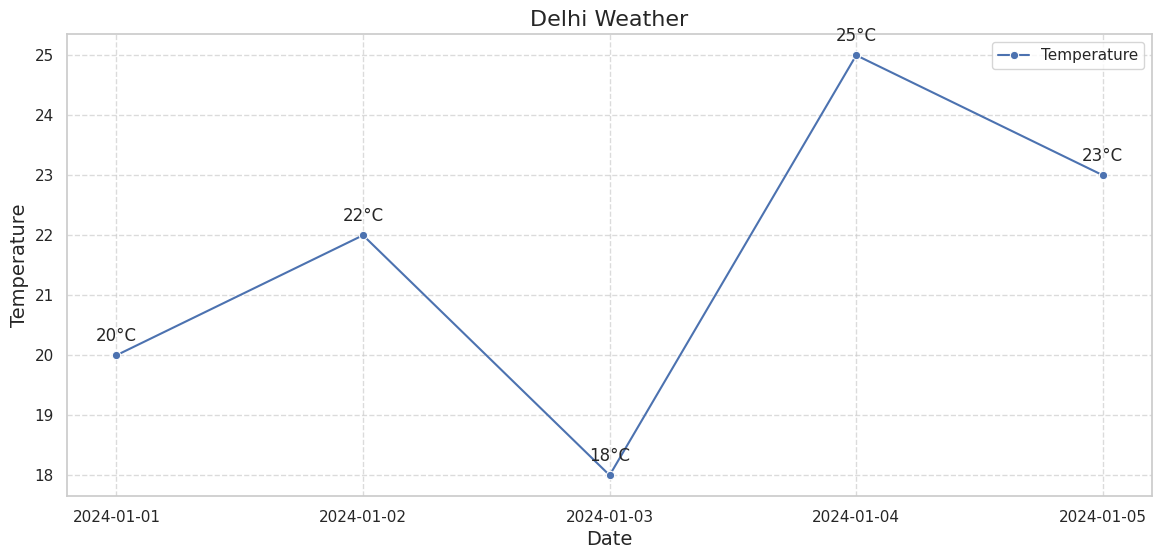

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns  # Menambahkan seaborn untuk gaya yang lebih menarik

# Data baru (contoh)
dates = ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']
new_delhi_final = [20, 22, 18, 25, 23]

# Plotting dengan gaya seaborn
sns.set(style="whitegrid")  # Mengatur gaya latar belakang

plt.figure(figsize=(14, 6))

# Gunakan lineplot untuk tampilan yang lebih modern dan informatif
sns.lineplot(x=dates, y=new_delhi_final, marker='o', color='b', label='Temperature')

# Menambahkan judul dan label sumbu
plt.title('Delhi Weather', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Menambahkan grid untuk memudahkan membaca data
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan label pada titik data
for i, txt in enumerate(new_delhi_final):
    plt.annotate(f'{txt}°C', (dates[i], new_delhi_final[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [31]:
# mengambil data nilai
date = df['datetime_utc'].values
temp = df[' _tempm'].values

In [32]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # Menambahkan dimensi tambahan ke series menggunakan tf.expand_dims
    series = tf.expand_dims(series, axis=-1)

    # Membuat tf.data.Dataset dari series
    ds = tf.data.Dataset.from_tensor_slices(series)

    # Membagi dataset menjadi jendela berukuran window_size + 1 dengan pergeseran 1
    # drop_remainder=True memastikan bahwa jendela terakhir yang mungkin lebih kecil diabaikan
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)

    # Mengubah dataset menjadi bentuk flat_map agar dapat diatur sebagai batch
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))

    # Mengacak dataset menggunakan nilai shuffle_buffer yang diberikan
    ds = ds.shuffle(shuffle_buffer)

    # Memetakan setiap elemen dataset menjadi pasangan input-output
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    # Membuat batch dari dataset dengan ukuran batch_size
    # prefetch(1) memungkinkan prefetching satu batch ke depan untuk mempercepat pelatihan
    return ds.batch(batch_size).prefetch(1)


In [34]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data pelatihan (train) dan data uji (test)
# temp adalah fitur atau atribut dataset
# date adalah label atau target dataset
# test_size=0.2 mengindikasikan bahwa 20% dari data akan digunakan sebagai data uji
# random_state=0 memberikan seed untuk pengacakan, sehingga hasilnya dapat direproduksi
# shuffle=False memastikan bahwa data tidak diacak sebelum pembagian, menggunakan urutan asli
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size=0.2, random_state=0, shuffle=False)

# Mencetak panjang data pelatihan dan data uji
print(len(x_train), len(x_test))


80792 20198


In [68]:
from keras.layers import Dense, LSTM
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

# Membuat dataset menggunakan fungsi windowed_dataset untuk data pelatihan dan data uji
data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

# Membuat model menggunakan Sequential API dari Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

# Membuat schedule untuk learning rate berdasarkan epoch
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Menggunakan stochastic gradient descent (SGD) sebagai optimizer
optimizer = SGD(learning_rate=1e-8, momentum=0.9)

# Mengompilasi model dengan menggunakan fungsi loss Huber dan metric MAE (Mean Absolute Error)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

max_value = df[' _tempm'].max()
print('Max value : ')
print(max_value)

min_value = df[' _tempm'].min()
print('Min Value : ')
print(min_value)


Max value : 
90.0
Min Value : 
1.0


In [69]:
# Menghitung 10% dari selisih antara 90.0 dan 1.0
temperature_difference = 90.0 - 1.0
percentage = 10
result = temperature_difference * (percentage / 100)

# Menampilkan hasil perhitungan
print("10% of the temperature difference between 90.0 and 1.0 is:", result)


10% of the temperature difference between 90.0 and 1.0 is: 8.9


In [70]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [71]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=10, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/10
808/808 [==============================] - 328s 399ms/step - loss: 25.4868 - mae: 25.9775 - val_loss: 6.5213 - val_mae: 7.0012
Epoch 2/10
808/808 [==============================] - ETA: 0s - loss: 6.1436 - mae: 6.6214
MAE of the model < 10% of data scale
808/808 [==============================] - 319s 393ms/step - loss: 6.1436 - mae: 6.6214 - val_loss: 6.0291 - val_mae: 6.5084


Visualisasi Loss Model

<ipython-input-80-442f60bfaf15>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Anda dapat memilih gaya yang sesuai dengan preferensi Anda


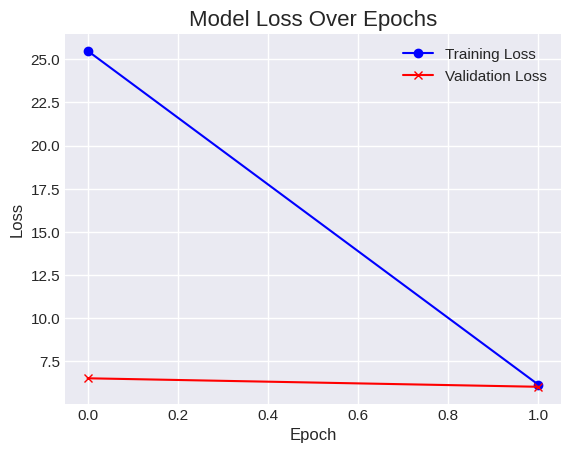

In [80]:
import matplotlib.pyplot as plt

# Melihat gaya plot yang tersedia di Matplotlib
plt.style.available
plt.style.use('seaborn-darkgrid')  # Anda dapat memilih gaya yang sesuai dengan preferensi Anda

# Plot loss dan val_loss dengan warna dan marker yang berbeda
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='x')

# Menambahkan judul dan label sumbu
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menambahkan grid untuk mempermudah pembacaan grafik
plt.grid(True)

# Menampilkan plot
plt.show()


*Visualisasi MAE*

<ipython-input-81-9f796f0dfc24>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Anda dapat memilih gaya yang sesuai dengan preferensi Anda


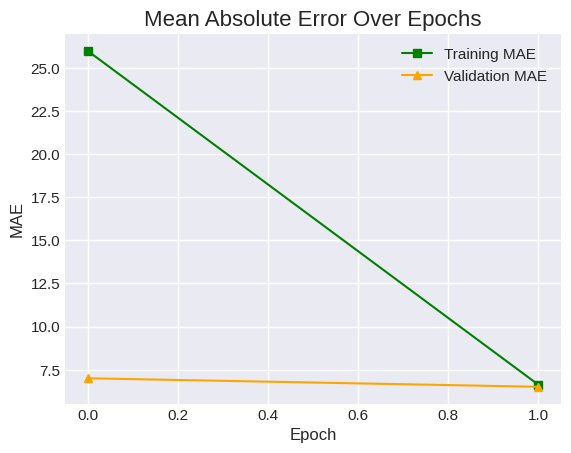

In [81]:
import matplotlib.pyplot as plt

# Melihat gaya plot yang tersedia di Matplotlib
plt.style.available
plt.style.use('seaborn-darkgrid')  # Anda dapat memilih gaya yang sesuai dengan preferensi Anda

# Plot mae dan val_mae dengan warna dan marker yang berbeda
plt.plot(history.history['mae'], label='Training MAE', color='green', marker='s')
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange', marker='^')

# Menambahkan judul dan label sumbu
plt.title('Mean Absolute Error Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menambahkan grid untuk mempermudah pembacaan grafik
plt.grid(True)

# Menampilkan plot
plt.show()

